In [1]:
from algorithms import *


=== Solver: CG - Synthetic Data ===
Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Training completed in 1.39 seconds. Final loss: 342.1762


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(


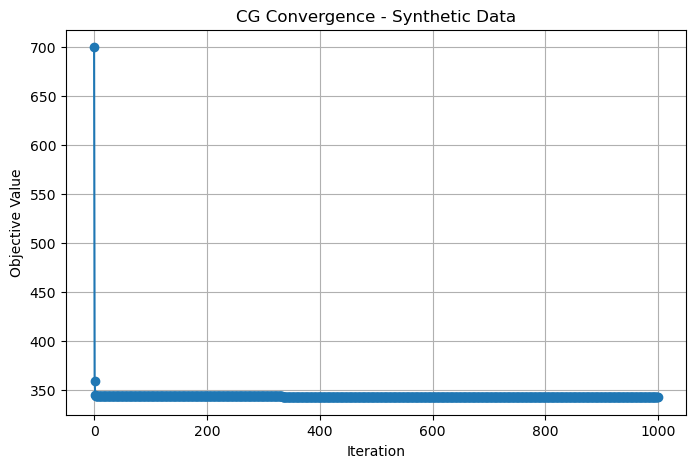

c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82       156
           1       0.92      0.60      0.73       144

    accuracy                           0.78       300
   macro avg       0.82      0.78      0.77       300
weighted avg       0.82      0.78      0.78       300

ROC AUC: 0.7761752136752137
Precision: 0.9247311827956989
Recall: 0.5972222222222222
Weight norm: 0.5935969376615834

=== Solver: CG - Real Data ===
Using scipy LineaSearch
Training completed in 0.45 seconds. Final loss: 151.7552


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(


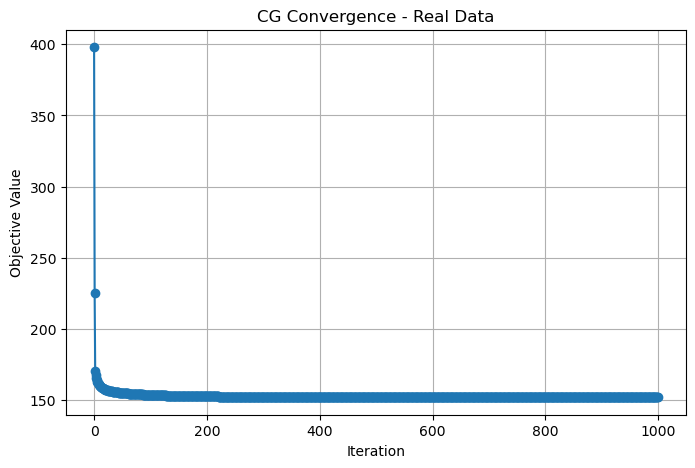

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        63
           1       0.96      1.00      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

ROC AUC: 0.9682539682539683
Precision: 0.9642857142857143
Recall: 1.0
Weight norm: 2.0349232250697487

=== Solver: LBFGS - Synthetic Data ===
Training completed in 0.50 seconds. Final loss: 342.1074


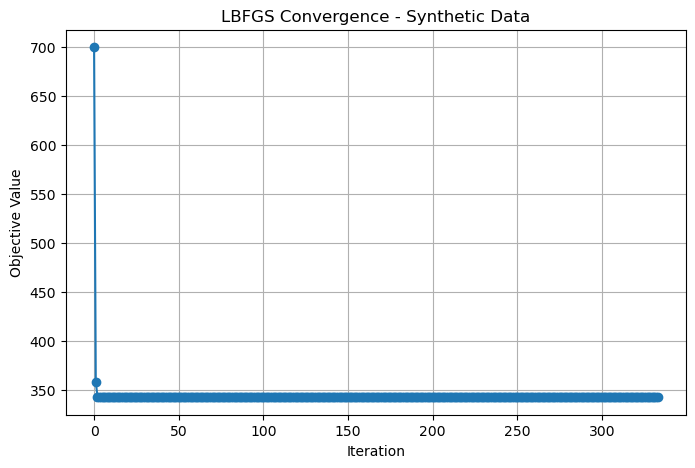

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81       156
           1       0.89      0.62      0.73       144

    accuracy                           0.78       300
   macro avg       0.81      0.77      0.77       300
weighted avg       0.80      0.78      0.77       300

ROC AUC: 0.7737713675213675
Precision: 0.89
Recall: 0.6180555555555556
Weight norm: 0.46327450594690084

=== Solver: LBFGS - Real Data ===
Training completed in 0.02 seconds. Final loss: 151.7395


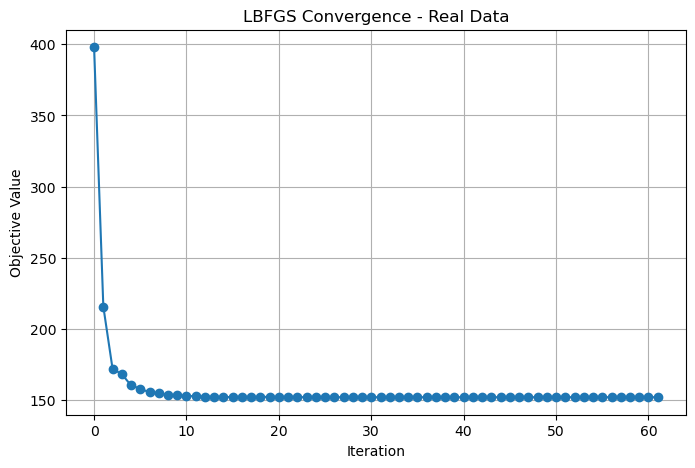

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        63
           1       0.96      1.00      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

ROC AUC: 0.9682539682539683
Precision: 0.9642857142857143
Recall: 1.0
Weight norm: 2.0481068237782165


In [ ]:
import numpy as np
import pandas as pd
import time

from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


def test_solvers():
    X_syn, y_syn = make_classification(
        n_samples=1000, n_features=2000, 
        n_informative=1998, n_redundant=2,
        n_classes=2, random_state=42, class_sep=2.0,
    )
    data = load_breast_cancer()
    X_real, y_real = data.data, data.target

    scaler = StandardScaler()
    X_syn = scaler.fit_transform(X_syn)
    X_real = scaler.fit_transform(X_real)

    print(np.min(np.std(X_syn, axis=0)))

    from scipy.sparse import issparse
    from scipy.sparse import csr_matrix

    X_real_sparse= csr_matrix(X_real)
    X_syn_sparse = csr_matrix(X_syn)
    print(issparse(X_real_sparse))  # Zwraca True jeśli X to macierz rzadka
    print(issparse(X_syn_sparse))  # Zwraca True jeśli X to macierz rzadka

    X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
        X_syn, y_syn, test_size=0.3, random_state=1)
    X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(
        X_real, y_real, test_size=0.3, random_state=1)

    solvers = ['cg', 'lbfgs']
    results = []

    for solver in solvers:
        clf = SquaredHingeClassifier(C=1.0, solver=solver)


        #synthetic data
        t0 = time.time()
        clf.fit(X_syn_train, y_syn_train)
        t_syn = time.time() - t0
        y_syn_pred = clf.predict(X_syn_test)
        acc_syn = accuracy_score(y_syn_test, y_syn_pred)

        #real data
        t0 = time.time()
        clf.fit(X_real_train, y_real_train)
        t_real = time.time() - t0
        y_real_pred = clf.predict(X_real_test)
        acc_real = accuracy_score(y_real_test, y_real_pred)

        results.append({
            'solver': solver,
            'syn_accuracy': acc_syn,
            'syn_time_s': t_syn,
            'real_accuracy': acc_real,
            'real_time_s': t_real
        })

    df = pd.DataFrame(results)
    print(df)
    print("\nSynthetic Data ")
    for solver in solvers:
        clf = SquaredHingeClassifier(C=1.0, solver=solver)
        clf.fit(X_syn_train, y_syn_train)
        print(f"\nSolver = {solver}")
        print(classification_report(y_syn_test, clf.predict(X_syn_test)))
    
    print("\nReal Data:")
    for solver in solvers:
        clf = SquaredHingeClassifier(C=1.0, solver=solver)
        clf.fit(X_real_train, y_real_train)
        print(f"\nSolver = {solver}")
        print(classification_report(y_real_test, clf.predict(X_real_test)))


def test_solvers2():
    X_syn, y_syn = make_classification(n_samples=1000, n_features=2000,
                                       n_informative=1998, n_redundant=2,
                                       n_classes=2, random_state=42, class_sep=2.0)
    data = load_breast_cancer()
    X_real, y_real = data.data, data.target

    scaler = StandardScaler()
    X_syn = scaler.fit_transform(X_syn)
    X_real = scaler.fit_transform(X_real)

    X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.3, random_state=1)
    X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(X_real, y_real, test_size=0.3, random_state=1)

    solvers = ['cg', 'lbfgs']

    for solver in solvers:
        print(f"\n=== Solver: {solver.upper()} - Synthetic Data ===")
        grid = cross_validate_C(X_syn_train, y_syn_train, solver=solver)
        print("Best C:", grid.best_params_['C'])
        plot_train_val_error(grid, title=f"{solver.upper()} on Synthetic Data")
        evaluate_model(grid.best_estimator_, X_syn_test, y_syn_test)

        print(f"\n=== Solver: {solver.upper()} - Real Data ===")
        grid = cross_validate_C(X_real_train, y_real_train, solver=solver)
        print("Best C:", grid.best_params_['C'])
        plot_train_val_error(grid, title=f"{solver.upper()} on Real Data")
        evaluate_model(grid.best_estimator_, X_real_test, y_real_test)

        


if __name__ == "__main__":
    #test_solvers()
    test_solvers2()



=== Solver: CG - Synthetic Data ===
Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:167: RuntimeWarning: invalid value encountered in multiply
  p = r_new + beta * p #descent direction from same slide


Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:167: RuntimeWarning: invalid

Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:167: RuntimeWarning: invalid

Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi

Using scipy LineaSearch
Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi

Using scipy LineaSearch
Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:167: RuntimeWarning: invalid

Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:167: RuntimeWarning: invalid

Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(


Best C: 0.001


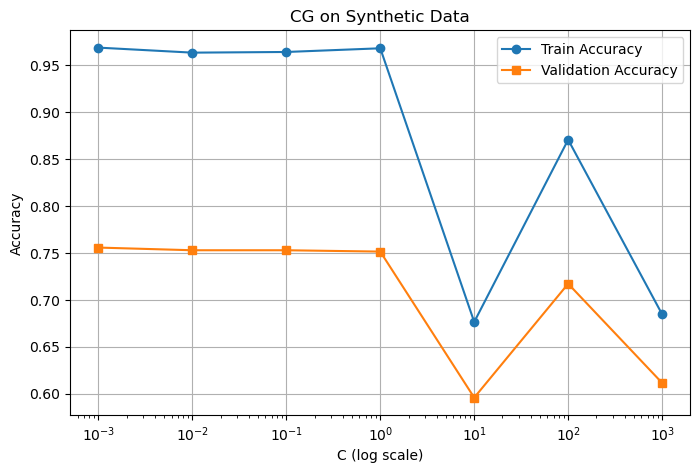

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.94      0.81       156
           1       0.90      0.59      0.71       144

    accuracy                           0.77       300
   macro avg       0.81      0.77      0.76       300
weighted avg       0.81      0.77      0.77       300

ROC AUC: 0.766292735042735
Precision: 0.9042553191489362
Recall: 0.5902777777777778
Weight norm: 0.33150346663708113
Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Training completed in 2.69 seconds. Final loss: 0.4202


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(


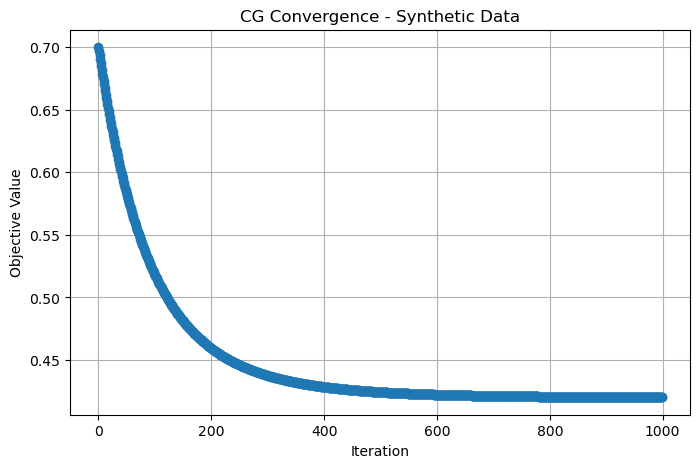

c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(



=== Solver: CG - Real Data ===
Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(


Using scipy LineaSearch


c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in multiply
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optyma

Using scipy LineaSearch
Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:167: RuntimeWarning: invalid

Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in multiply
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in multiply
  margins = 1 - y * (X @ w)
c

Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:167: RuntimeWarning: invalid

Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:167: RuntimeWarning: invalid

Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:167: RuntimeWarning: invalid

Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:167: RuntimeWarning: invalid

Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:167: RuntimeWarning: invalid

Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:22: RuntimeWarning: overflow encountered in square
  return 0.5 * np.dot(w, w) + C * np.sum(np.maximum(0, margins)**2) #return 0.5 of the dot prodct of w, because we take into account the gradeint which would tourn it into 1 not 2
c:\Users\olako\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:396: RuntimeWarning: invalid value encountered in sc

Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:21: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:32: RuntimeWarning: invalid value encountered in matmul
  margins = 1 - y * (X @ w)
c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:167: RuntimeWarning: invalid

Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(


Best C: 10.0


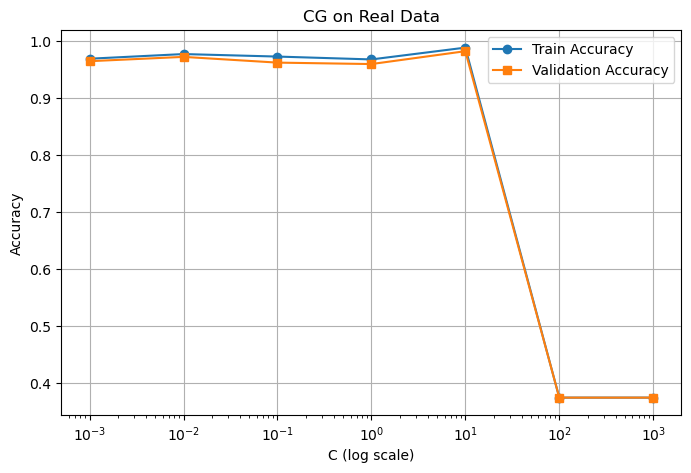

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

ROC AUC: 0.9702380952380952
Precision: 0.9813084112149533
Recall: 0.9722222222222222
Weight norm: 24.199714967059194
Using scipy LineaSearch


c:\Users\olako\anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:59: LineSearchWarning: The line search algorithm did not converge
  alpha, _, _, f_new, f_old, derphi = line_search(
c:\Users\olako\Desktop\optymalizacja\Optimization\algorithms.py:180: RuntimeWarning: CG doesn't converge
  warnings.warn(


Training completed in 2.05 seconds. Final loss: 1782.8232


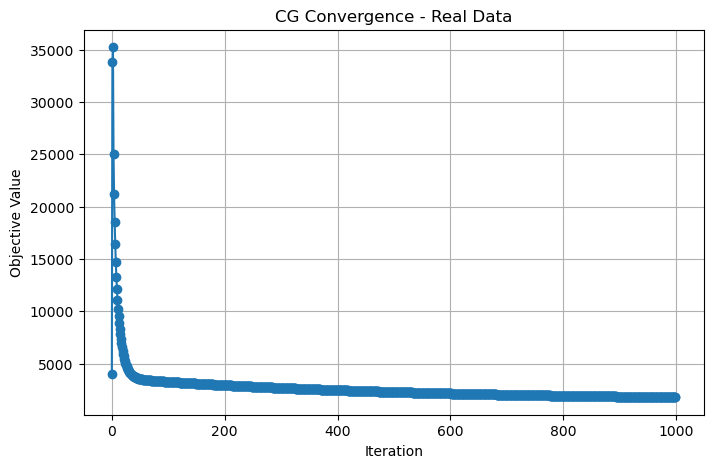


=== Solver: LBFGS - Synthetic Data ===
Best C: 100.0


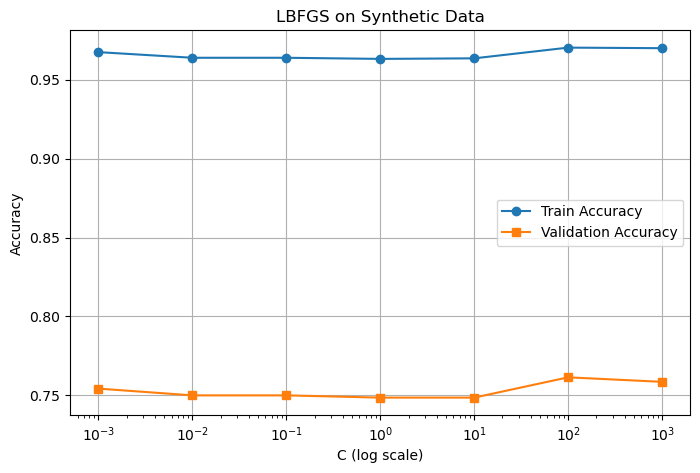

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.95      0.82       156
           1       0.91      0.59      0.72       144

    accuracy                           0.78       300
   macro avg       0.81      0.77      0.77       300
weighted avg       0.81      0.78      0.77       300

ROC AUC: 0.7694978632478632
Precision: 0.9139784946236559
Recall: 0.5902777777777778
Weight norm: 0.7967343223264686
Training completed in 0.41 seconds. Final loss: 34200.3177


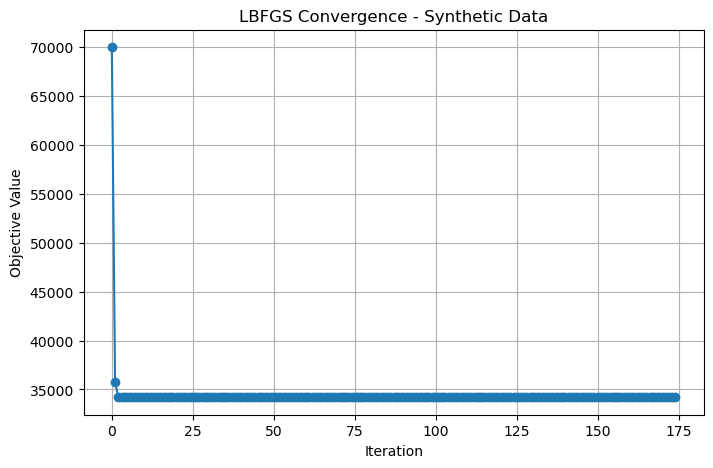


=== Solver: LBFGS - Real Data ===
Best C: 0.01


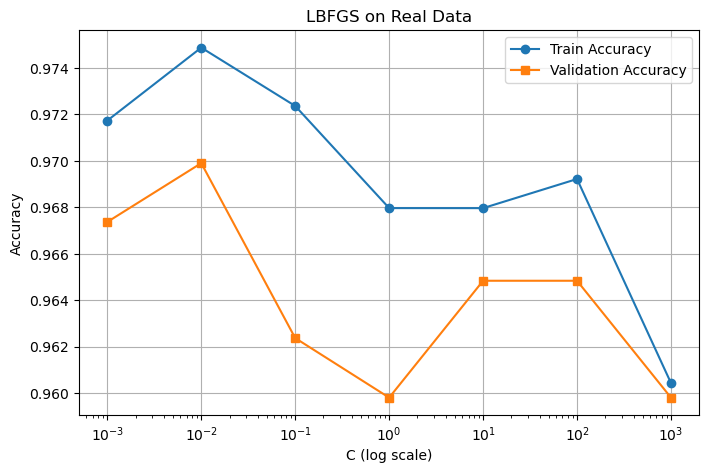

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

ROC AUC: 0.958994708994709
Precision: 0.9636363636363636
Recall: 0.9814814814814815
Weight norm: 0.5799432439081578
Training completed in 0.03 seconds. Final loss: 1.8458


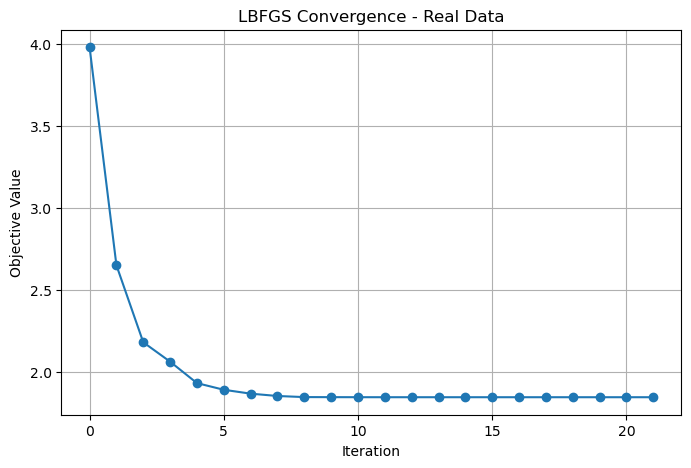


=== Solver: TRON - Synthetic Data ===
Best C: 0.001


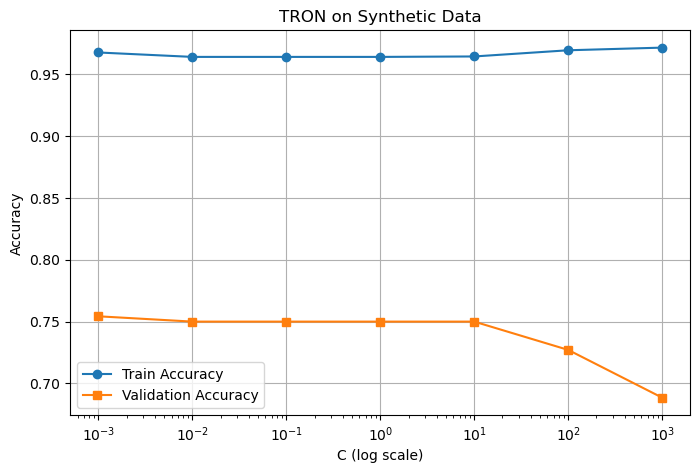

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.94      0.81       156
           1       0.89      0.59      0.71       144

    accuracy                           0.77       300
   macro avg       0.80      0.76      0.76       300
weighted avg       0.80      0.77      0.76       300

ROC AUC: 0.7630876068376068
Precision: 0.8947368421052632
Recall: 0.5902777777777778
Weight norm: 0.3399886775010221
Training completed in 0.14 seconds. Final loss: 0.4200


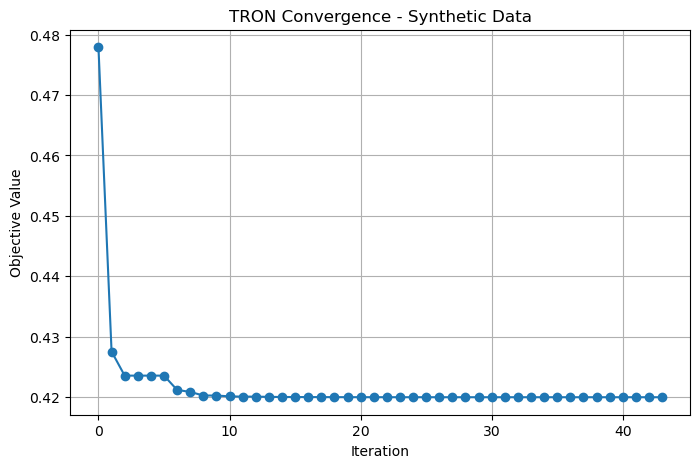


=== Solver: TRON - Real Data ===
Best C: 0.01


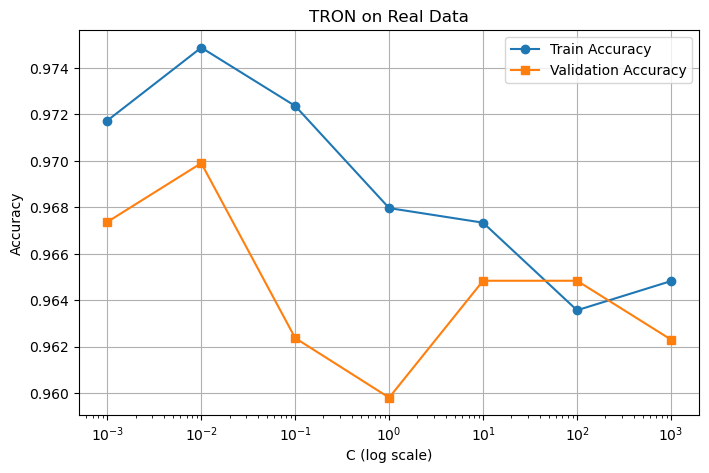

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

ROC AUC: 0.958994708994709
Precision: 0.9636363636363636
Recall: 0.9814814814814815
Weight norm: 0.5799235296175124
Training completed in 1.31 seconds. Final loss: 1.8458


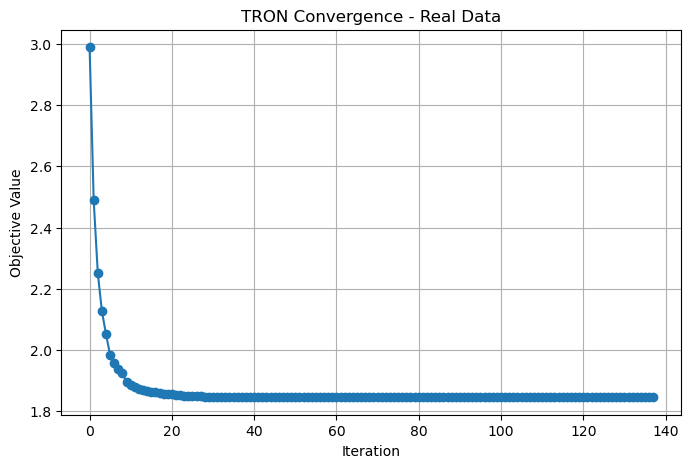

In [4]:
def test_solvers2():
    X_syn, y_syn = make_classification(n_samples=1000, n_features=2000,
                                       n_informative=1998, n_redundant=2,
                                       n_classes=2, random_state=42, class_sep=2.0)
    data = load_breast_cancer()
    X_real, y_real = data.data, data.target

    scaler = StandardScaler()
    X_syn = scaler.fit_transform(X_syn)
    X_real = scaler.fit_transform(X_real)

    X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.3, random_state=1)
    X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(X_real, y_real, test_size=0.3, random_state=1)

    solvers = ['cg', 'lbfgs', 'tron']

    for solver_name in solvers:
        print(f"\n=== Solver: {solver_name.upper()} - Synthetic Data ===")

        # Grid search for best C
        grid = cross_validate_C(X_syn_train, y_syn_train, solver=solver_name)
        best_C = grid.best_params_['C']
        print("Best C:", best_C)
        plot_train_val_error(grid, title=f"{solver_name.upper()} on Synthetic Data")
        evaluate_model(grid.best_estimator_, X_syn_test, y_syn_test)

        # Train for convergence plot
        if solver_name == 'cg':
            solver = ConjugateGradientSolver(method='scipy', max_iter=1000, tol=1e-3)
        elif solver_name == 'lbfgs':
            solver = LBFGSSolver()
        elif solver_name == 'tron':
            solver = TrustRegionNewtonSolver()
        else:
            continue  # Unknown solver, skip

        w, loss, duration, loss_history = solver.solve(X_syn_train, y_syn_train, C=best_C)
        print(f"Training completed in {duration:.2f} seconds. Final loss: {loss:.4f}")
        plot_convergence(loss_history, title=f"{solver_name.upper()} Convergence - Synthetic Data")

        print(f"\n=== Solver: {solver_name.upper()} - Real Data ===")
        grid = cross_validate_C(X_real_train, y_real_train, solver=solver_name)
        best_C = grid.best_params_['C']
        print("Best C:", best_C)
        plot_train_val_error(grid, title=f"{solver_name.upper()} on Real Data")
        evaluate_model(grid.best_estimator_, X_real_test, y_real_test)

        if solver_name == 'cg':
            solver = ConjugateGradientSolver(method='scipy', max_iter=1000, tol=1e-3)
        elif solver_name == 'lbfgs':
            solver = LBFGSSolver()
        elif solver_name == 'tron':
            solver = TrustRegionNewtonSolver()
        else:
            continue

        w, loss, duration, loss_history = solver.solve(X_real_train, y_real_train, C=best_C)
        print(f"Training completed in {duration:.2f} seconds. Final loss: {loss:.4f}")
        plot_convergence(loss_history, title=f"{solver_name.upper()} Convergence - Real Data")

if __name__ == "__main__":
    test_solvers2()
